# Transformation Task 3

## Requirement

    1. Open image “Orange.png and “Water.jpg”;
    2. Scale each image to 50 % by multiplying each by 0.5;
    3. Add the two scaled images to get a composite image;
    4. Adjust the scaling to give a nicer output.

    Advanced Task:
        Investigate the addWeighted function to achieve the same.

In [1]:
# Import libraries

%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui
import math

<function matplotlib.pyplot.show(close=None, block=None)>

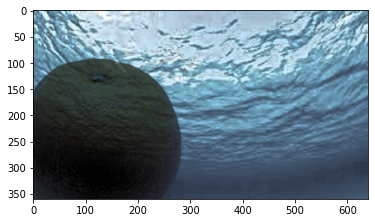

In [93]:
def histogram_equalization(img_in):
# segregate color streams
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculate cdf
    cdf_b = np.cumsum(h_b)
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)

# mask all pixels with value=0 and replace it with mean of the pixel values
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')

    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]

    img_out = cv2.merge((img_b, img_g, img_r))
# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    return img_out

def show_rgb_equalized(image):
    channels = cv2.split(image)
    eq_channels = []
    for ch, color in zip(channels, ['B', 'G', 'R']):
        eq_channels.append(cv2.equalizeHist(ch))

    eq_image = cv2.merge(eq_channels)
    eq_image = cv2.cvtColor(eq_image, cv2.COLOR_BGR2RGB)
    return eq_image
# 1. Open image “Orange.png and “Water.jpg”;

O = cv2.imread("res\orange.png")
W = cv2.imread("res\water.jpg")
O = cv2.cvtColor(src = O, code = cv2.COLOR_RGB2BGR)
W = cv2.cvtColor(src = W, code = cv2.COLOR_RGB2BGR)
T = cv2.imread("res\Poor Lighting Img2.png")
T = cv2.cvtColor(src = T, code = cv2.COLOR_RGB2BGR)
# 2. Scale each image to 50 % by multiplying each by 0.5;

O = 0.5 * O
O = O.astype('uint8')
W = 0.5 * W
W = W.astype('uint8')

# 3. Add the two scaled images to get a composite image;

A = cv2.add(O,W)
S = cv2.subtract(O,W)
M = cv2.multiply(O,W, scale = 0.01)
D = cv2.divide(O,W, scale = 100)

# 4. Adjust the scaling to give a nicer output.

I = cv2.add(O,W)

img_yuv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

# equalize the histogram of the Y channel
#img_yuv[:,:,1] = img_yuv[:,:,1]

Values = img_yuv[:,:,0].ravel() #pixel values is unravelled from matrix form to 1D array
#plt.hist(Values, bins = 256, range = [0,256])

img_yuv[:,:,2] = cv2.equalizeHist(img_yuv[:,:,2])

# convert the YUV image back to RGB format
I = cv2.cvtColor(img_yuv, cv2.COLOR_HSV2BGR)

# 4. Adjust the scaling to give a nicer output.

#I = I * 1
#cv2.imshow("test", I)
#key = cv2.waitKey(0)
#cv2.destroyAllWindows()
E = histogram_equalization(I)
E2 = show_rgb_equalized(I)
plt.imshow(I)
plt.show


